In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

In [3]:
# Read Files
EU_df = pd.read_csv("EUmatch.csv")
KR_df = pd.read_csv("KRmatch.csv")
NA_df = pd.read_csv("NAmatch.csv")

In [4]:
# Combine all server data
combined_df = pd.concat([EU_df, KR_df, NA_df])

In [5]:
# TODO: identify outliers
combined_df.describe()

,d_spell,f_spell,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned
count,16381.000000,16363.000000,16347.000000,16389.000000,16394.000000,16358.000000,16411.000000,16386.000000,16400.000000,16404.000000,16351.000000,16399.000000,16395.000000,16373.000000,17228.000000,17228.000000
mean,7.336365,7.621830,7.988377,2586.752944,9320.385812,2587.573053,5.533788,3.705488,5.512500,13.585406,18.538683,20412.206354,0.992071,29.712331,112809.107325,10591.858718
std,4.197539,4.261555,5.570246,3198.889272,10283.902947,3189.672056,2.973558,3.941281,4.251065,2.427179,15.084288,9643.915695,1.276541,21.014722,69421.952092,3500.579298
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1736.000000,0.000000,1.000000,3597.000000,2900.000000
25%,4.000000,4.000000,4.000000,351.000000,1858.250000,351.000000,3.000000,1.333333,2.000000,12.000000,9.000000,13471.000000,0.000000,16.000000,61978.250000,8007.500000
50%,4.000000,4.000000,7.000000,1524.000000,5488.000000,1540.500000,5.000000,2.400000,5.000000,14.000000,16.000000,18806.000000,1.000000,24.000000,108920.000000,10169.000000
75%,12.000000,12.000000,11.000000,3701.000000,13442.000000,3703.500000,7.000000,4.500000,8.000000,15.000000,25.000000,25537.500000,2.000000,36.000000,154894.750000,12815.000000
max,21.000000,21.000000,41.000000,50654.000000,85778.000000,50654.000000,21.000000,35.000000,30.000000,18.000000,304.000000,102473.000000,9.000000,175.000000,557084.000000,28566.000000


In [6]:
# -- Data Cleaning --
# Remove kills, deaths & assists then remove all null data
combined_cleaned_df = combined_df.drop(columns=['kills', 'deaths', 'assists']).dropna()

In [7]:
# identify outliers 
combined_cleaned_df.describe()

,d_spell,f_spell,damage_objectives,damage_building,damage_turrets,kda,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned
count,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000
mean,7.309262,7.627510,2615.178702,9331.834054,2615.178702,3.747444,13.573267,18.276095,20277.709040,0.998558,29.647255,112658.971936,10570.991681
std,4.195518,4.257456,3234.187338,10307.907383,3234.187338,3.993880,2.409934,14.532245,9598.015286,1.281751,21.201235,68951.483396,3466.040331
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1736.000000,0.000000,1.000000,3597.000000,2900.000000
25%,4.000000,4.000000,355.000000,1834.500000,355.000000,1.333333,12.000000,8.000000,13402.000000,0.000000,16.000000,61701.500000,7998.500000
50%,4.000000,4.000000,1547.000000,5475.000000,1547.000000,2.428571,14.000000,16.000000,18751.000000,1.000000,23.000000,108414.000000,10151.000000
75%,12.000000,12.000000,3717.000000,13466.500000,3717.000000,4.500000,15.000000,25.000000,25348.000000,2.000000,36.000000,155337.000000,12816.000000
max,21.000000,21.000000,50654.000000,85778.000000,50654.000000,35.000000,18.000000,280.000000,86574.000000,8.000000,175.000000,499423.000000,26163.000000


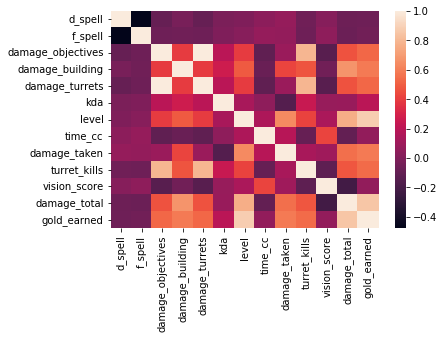

In [8]:
# Draw Heatmap
sns.heatmap(combined_cleaned_df.corr())
# TODO: VAT plot?

In [9]:
# -- Split, Train & Test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [10]:
# -- discretize the data --
def convert2discrete(df, column_list):
    """
    convert a column of the df to number
    """
    for col in column_list:
        # change the type of the column & the category codes
        df[col] = df[col].astype('category').cat.codes
    return df

In [11]:
combined_cleaned_converted_df = convert2discrete(
                                combined_cleaned_df, 
                                ['champion', 'side', 'role', 'minions_killed'])
combined_cleaned_converted_df

,d_spell,f_spell,champion,side,damage_objectives,damage_building,damage_turrets,kda,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned,role,minions_killed
1,1.0,4.0,9,1,4885.0,9190.0,4885.0,2.000000,14.0,26.0,17148.0,3.0,24.0,84282,10168,0,1
3,4.0,11.0,85,1,0.0,4920.0,0.0,1.500000,12.0,21.0,22136.0,0.0,29.0,109911,7570,1,0
4,4.0,14.0,81,0,0.0,0.0,0.0,1.000000,8.0,14.0,6680.0,0.0,20.0,17853,4377,0,0
6,4.0,14.0,69,1,720.0,3379.0,720.0,2.222222,12.0,33.0,15711.0,0.0,59.0,18443,8140,0,0
10,12.0,4.0,90,1,4944.0,7334.0,4944.0,2.000000,15.0,35.0,21993.0,1.0,22.0,96700,9861,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5747,14.0,4.0,137,1,136.0,2328.0,136.0,0.714286,12.0,30.0,13787.0,0.0,16.0,82042,7187,0,1
5749,4.0,12.0,2,0,0.0,0.0,0.0,1.200000,11.0,0.0,13742.0,0.0,10.0,46617,5722,1,1
5751,12.0,14.0,17,0,4489.0,4489.0,4489.0,0.500000,14.0,9.0,13633.0,1.0,19.0,100863,9005,1,1
5752,4.0,12.0,148,0,6114.0,11678.0,6114.0,1.000000,14.0,21.0,23092.0,2.0,20.0,150014,11888,1,1


In [12]:
# except for predicted term
X = combined_cleaned_converted_df.drop(columns=['kda'])

# predicted term
Y = combined_cleaned_converted_df['kda']

# get train & test part data
X_train, X_test, Y_train, Y_test = train_test_split(
                                        X, Y, 
                                        test_size=0.2, random_state = 0)


In [13]:
# do 10 fold
cross_validation = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)

In [16]:
regression_decision_tree = DecisionTreeRegressor(random_state=0)
regression_decision_tree.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [15]:
# TODO: find the method to test the model